In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
import numpy as np
%matplotlib nbagg

In [2]:
"/media/drc/DATA1/chris_labelfusion/logs_test/test_gan/train_real/0000003998_depth.png"

'/media/drc/DATA1/chris_labelfusion/logs_test/test_gan/train_real/0000003998_depth.png'

<IPython.core.display.Javascript object>


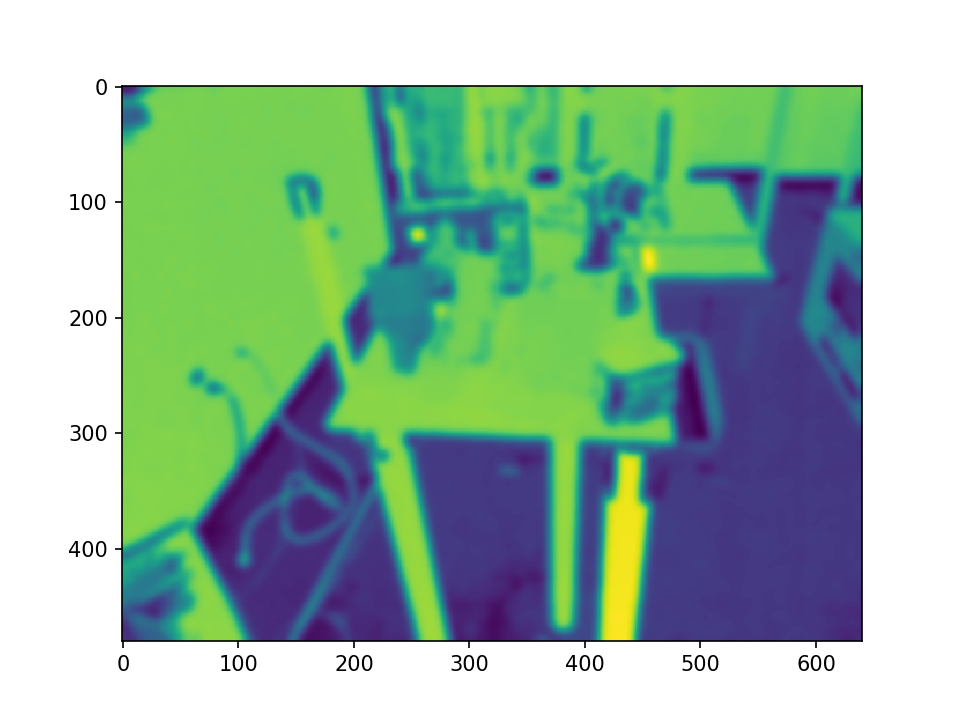

In [18]:
im =misc.imread("/media/drc/DATA1/chris_labelfusion/logs_test/test_gan/train_real/0000000002_depth.png")
plt.imshow(misc.imresize(im,(100,100)))


In [29]:
path = "/media/drc/DATA1/chris_labelfusion/logs_test/2017-06-16-15/images/"

In [19]:
def get_images_short(num,max_digits,path):
    depth_suffix = "_depth.png"
    norm_suffix = "normal_ground_truth.png"
    ground_truth_suffix = "depth_ground_truth.png"
    prefix = str(num).zfill(max_digits)
    img_d=misc.imread(path+prefix+depth_suffix)
    img_n=misc.imread(path+prefix+norm_suffix)
    img_gt=misc.imread(path+prefix+ground_truth_suffix)
    return [img_d,img_n,img_gt]

In [20]:
def get_images(num,max_digits,path):
    depth_suffix = "_depth.png"
    color_suffix = "_rgb.png"
    reflec_suffix = "_rgb_r.png"
    shade_suffix = "_rgb_s.png"
    norm_suffix = "normal_ground_truth.png"
    ground_truth_suffix = "depth_ground_truth.png"
    prefix = str(num).zfill(max_digits)
    img_d=misc.imread(path+prefix+depth_suffix)
    img_c=misc.imread(path+prefix+color_suffix)
    img_s=misc.imread(path+prefix+shade_suffix)
    img_r=misc.imread(path+prefix+reflec_suffix)
    img_n=misc.imread(path+prefix+norm_suffix)
    img_gt=misc.imread(path+prefix+ground_truth_suffix)
    return [img_d,img_c,img_s,img_r,img_n,img_gt]

In [21]:
def create_depth_mask(img,d_low,d_high):
    mask = np.logical_and(img >= d_low,img<=d_high)
    return mask

In [22]:
def angle_from_normal(img):
    return np.arccos(img[:,:,2])*180/np.pi*2

In [23]:
def ratio_from_normal(img):
    return img[:,:,2]

In [24]:
def convert_rgb_normal(img):
    return (img/255.*2)-1.

In [25]:
np.sum(ratio_from_normal(convert_rgb_normal(n))<0)

NameError: name 'n' is not defined

In [26]:
U, s, V = np.linalg.svd(d[50:450,50:550], full_matrices=True)
#plt.plot(s)
plt.imshow(misc.imresize(d[50:450,50:550],(50,50)))
#plt.imshow(np.matmul(U[:,0:28],V[0:28,:]))

NameError: name 'd' is not defined

In [30]:
d,c,s,r,n,g = get_images(2,10,path)

<IPython.core.display.Javascript object>


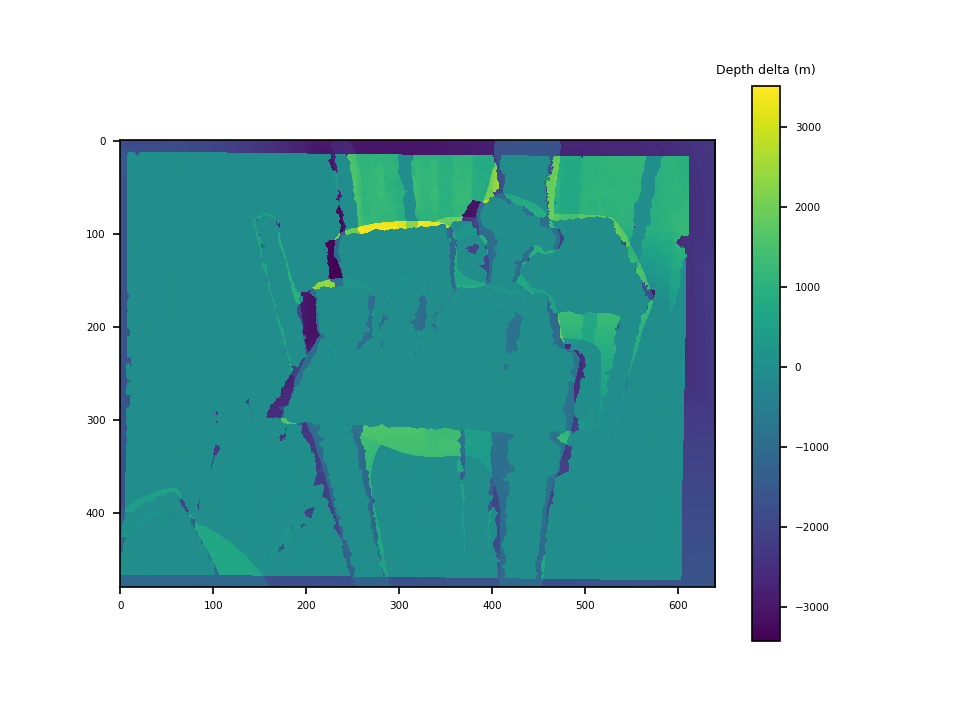

Text(0.5,1,u'Depth delta (m)')

In [55]:
plt.imshow(d-g)
clb = plt.colorbar()
clb.ax.set_title('Depth delta (m)')

<IPython.core.display.Javascript object>


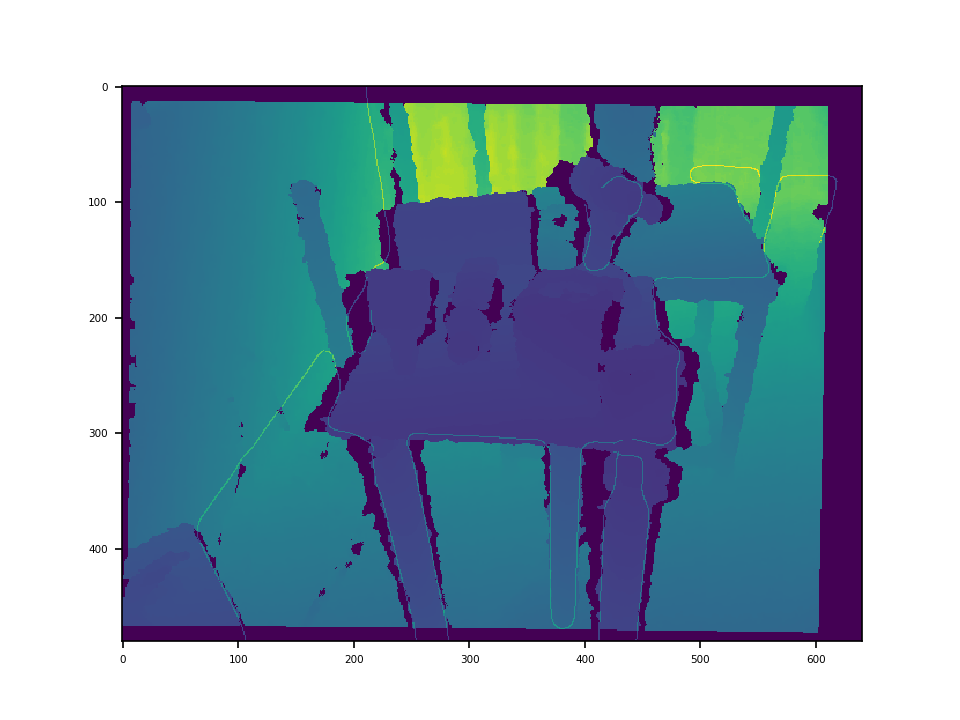

In [65]:
from scipy import ndimage as ndi
from skimage import filter
from skimage import color
from skimage import io
rg = color.rgb2gray(r)
rg = ndi.gaussian_filter(rg,4)
edges1 = filter.canny(rg)
edges2 = filter.canny(rg,sigma =6)
plt.imshow(edges1)
plt.imshow(edges2+d*.001)

## The Data we have

<IPython.core.display.Javascript object>


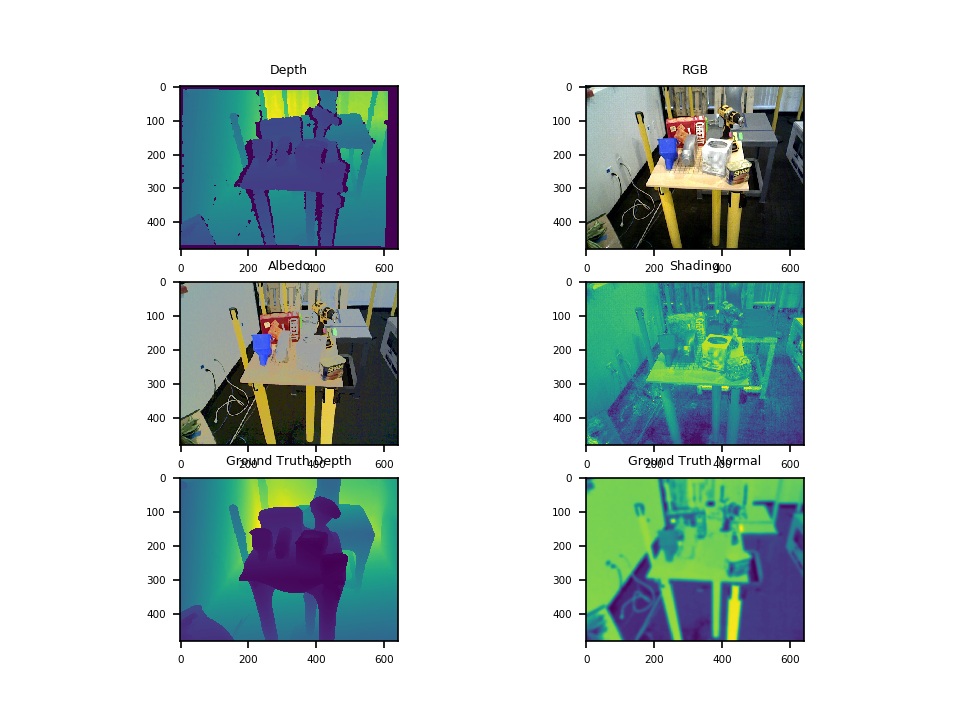

In [31]:
plt.rcParams.update({'font.size': 5})
fig = plt.figure()
a=fig.add_subplot(3,2,1)
imgplot = plt.imshow(d)
a.set_title('Depth')
a=fig.add_subplot(3,2,2)
imgplot = plt.imshow(c)
a.set_title('RGB')
a=fig.add_subplot(3,2,3)
imgplot = plt.imshow(r)
a.set_title('Albedo')
a=fig.add_subplot(3,2,4)
imgplot = plt.imshow(s)
a.set_title('Shading')
a=fig.add_subplot(3,2,5)
imgplot = plt.imshow(g)
a.set_title('Ground Truth Depth')
a=fig.add_subplot(3,2,6)
imgplot = plt.imshow(n)
a.set_title('Ground Truth Normal')
plt.show()

# other data to try
    
    can we get raw ir image?
    derivative of ground truth depth RGB, sharp discontinuites not captured by normal angle

## Where do the depth values differ

In [12]:
d1= np.copy(d)
gt1 =np.copy(g)
mask = create_depth_mask(gt1,0,1300)
d1[~mask]=0
gt1[~mask]=0
plt.imshow(d1-gt1)

<IPython.core.display.Javascript object>


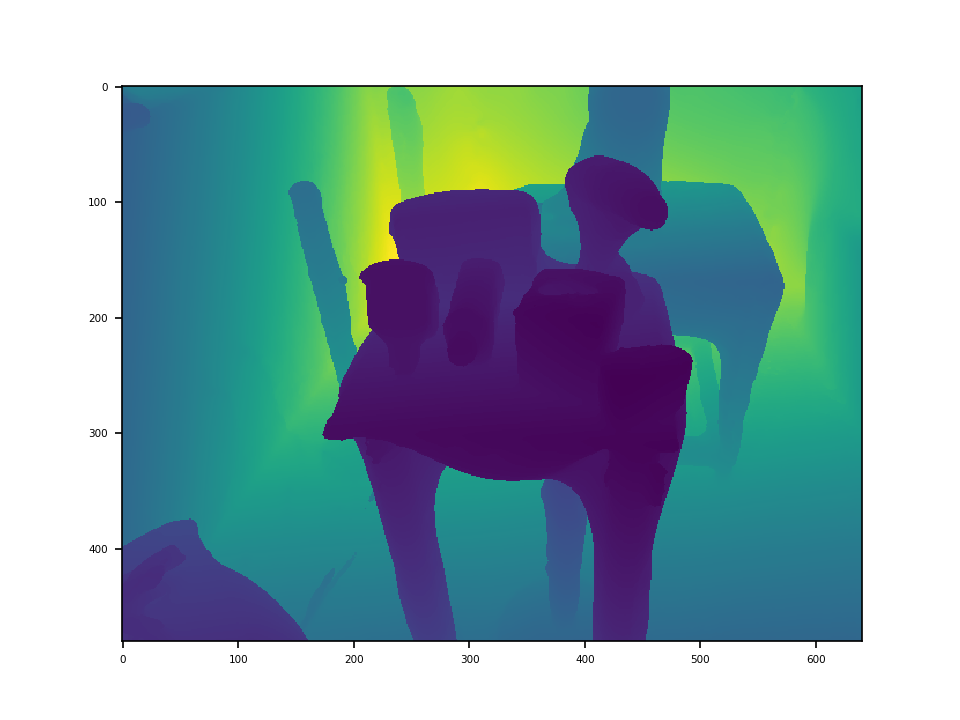

In [84]:
#c[~mask]=0
plt.imshow(g)

## Lets try predicting binary depth return given intrinsic intensities

<IPython.core.display.Javascript object>


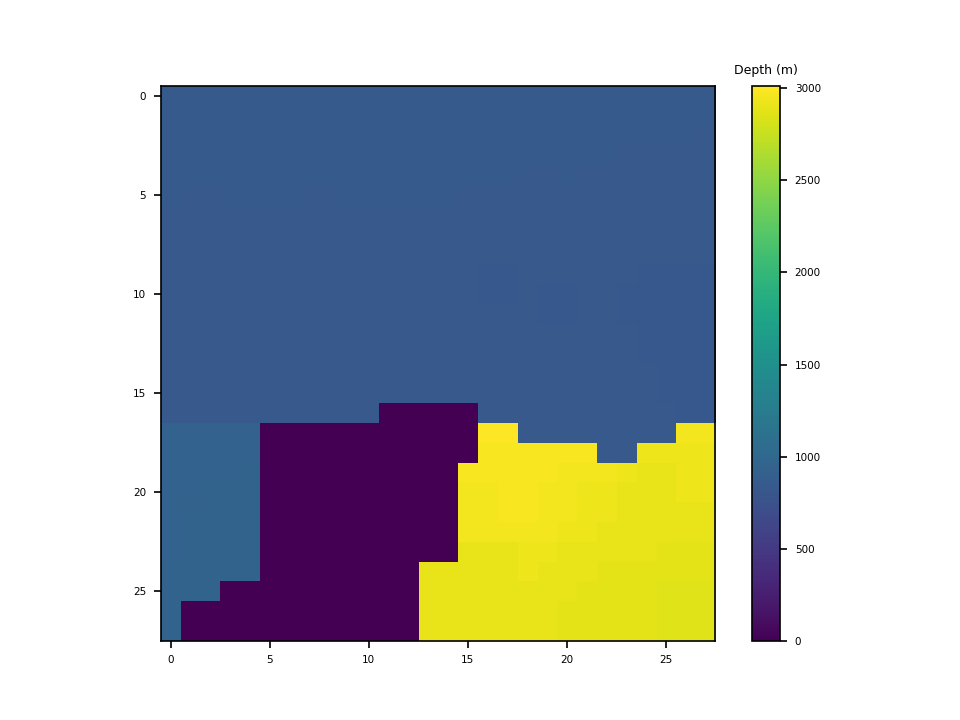

In [15]:
from matplotlib import cm
plt.imshow(d[250:278,250:278])
clb = plt.colorbar()
clb.ax.set_title('Depth (m)')
 
plt.show()

In [23]:
def test(path,start=1,end=10,bounds=[100,400,100,500],file_digits=10):
    x = []
    num_pos=0
    for i in range(start,end+1):
        d,n,gt = get_images_short(i,file_digits,path)
        pos = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]==0)   
        data = map(lambda x: n[x[0],x[1]],pos)
        x.extend(data)        
    return np.array(x)
x=test(path,1,2)

In [153]:
def calc_PRF(tp,fp,fn):
    P = tp/float(tp+fp)
    R= tp/float(tp+fn)
    if tp ==0:
        return P,R,0
    return (P,R,2.*P*R/(P+R))

In [53]:
[0, 0] in np.argwhere(np.zeros((2,2))%2==0)

True

In [212]:
zeros = np.argwhere(d[50:400,20:500]==0)
zeros

array([[  0, 411],
       [  0, 412],
       [  0, 413],
       ..., 
       [349, 436],
       [349, 437],
       [349, 438]])

In [213]:
non_zeros = np.argwhere(d[50:400,20:500]!=0)
non_zeros

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ..., 
       [349, 477],
       [349, 478],
       [349, 479]])

In [223]:
norm[non_zeros[:,0],non_zeros[:,1]]

array([  59.85286973,   58.02597186,   59.85286973, ...,  115.00607415,
        116.0685625 ,  116.0685625 ])

In [226]:
norm = angle_from_normal(convert_rgb_normal(n[50:400,20:500]))
norm[-1][-1]

116.0685624984061

In [ ]:
z = np.take(norm,zeros)[:,0]

In [ ]:
z1 = np.take(norm,non_zeros)[:,0]

<IPython.core.display.Javascript object>


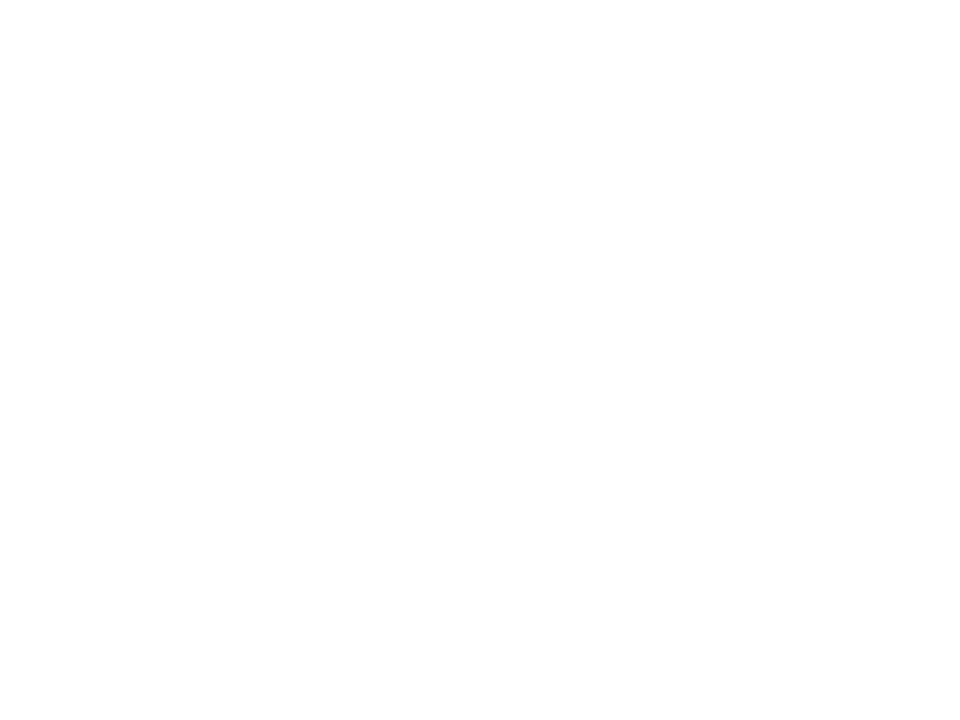

In [34]:
def plot_hist(path,num_params=50,start=2,end=3000,file_digits=10):
        params = np.linspace(0,1,num_params)
        data = dict.fromkeys(params,0)
        data_tot = dict.fromkeys(params,0)
        len1=0
        len2=0
        for i in range(start,end+1):
            d,n,gt = get_images_short(i,file_digits,path)
            d= d[50:400,20:500]
            n = n[50:400,20:500]
            gt = gt[50:400,20:500]
            norm = ratio_from_normal(convert_rgb_normal(n))
            zeros = np.argwhere(d==0)
            len1+=len(zeros)
            zeros = np.array(filter(lambda x: gt[x[0],x[1]]<1200,zeros))
            len2+=len(zeros)
            z = norm[zeros[:,0],zeros[:,1]]
            h,w  = np.shape(norm)
            for i in range(h):
                for j in range(w):
                    if gt[i,j]<1200:
                        data_tot[params[(np.abs(params-norm[i,j])).argmin()]]+=1
            for i in z:
                data[params[(np.abs(params-i)).argmin()]]+=1
        vals= []
        for key in data.keys():
            vals.append(data[key]/float(data_tot[key]))
        plt.bar(data.keys(),vals,width=.01)
        return data,data_tot,len1,len2
a = plot_hist(path)

<IPython.core.display.Javascript object>


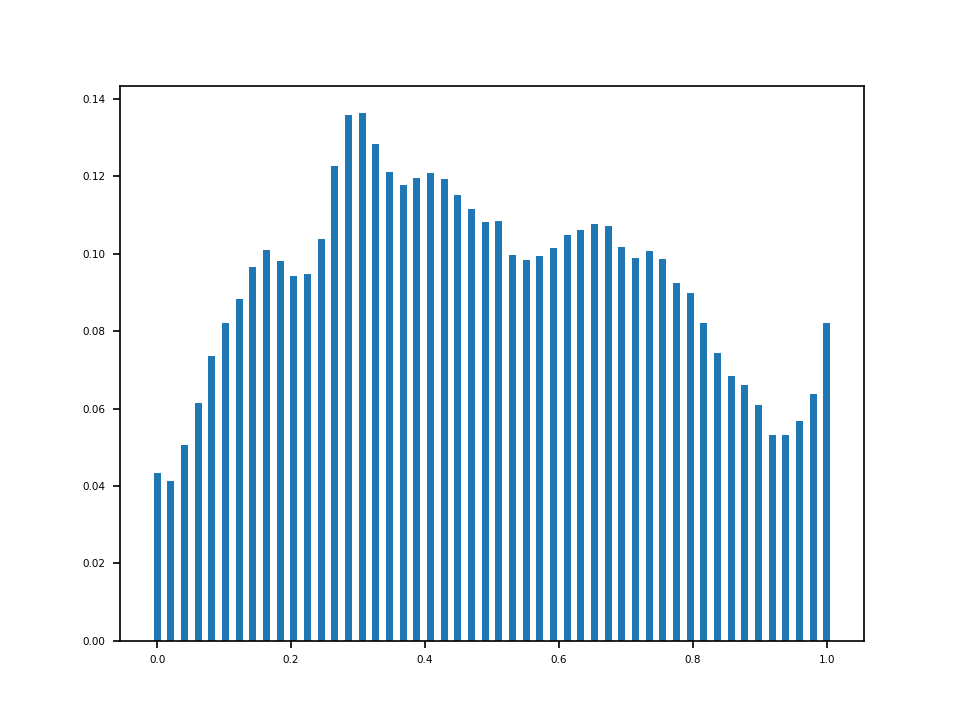

<Container object of 50 artists>

In [79]:
vals=[]
for key in a[0].keys():
        vals.append(a[0][key]/float(a[1][key]))
plt.bar(a[0].keys(),vals,width=.01)

In [227]:
def param_search(path,params,start=1,end=10,file_digits=10):
    param_scores = {}
    for p in params:
        print "param "+str(p)
        tp = 0
        fn = 0
        fp = 0
        for i in range(start,end+1):
            d,n,gt = get_images_short(i,file_digits,path)
            h,w = np.shape(d)
            d= d[50:400,20:500]
            n = n[50:400,20:500]
            gt = gt[50:400,20:500]
            norm = angle_from_normal(convert_rgb_normal(n))
            zeros = np.argwhere(d==0)
            non_zeros = np.argwhere(d!=0)
            z = norm[zeros[:,0],zeros[:,1]]
            z1 = norm[non_zeros[:,0],non_zeros[:,1]]
            true_pos = np.sum(z<p)
            f_pos = len(z)-true_pos
            tp += true_pos
            fn +=f_pos
            fp += np.sum(z1<p)
        print(tp,fn,fp)
        param_scores[round(np.nan_to_num(calc_PRF(tp,fp,fn))[0],5)] = p
    k = np.max(np.nan_to_num(param_scores.keys()))
    print np.nan_to_num(param_scores.keys())
    return param_scores[k],k
        

In [229]:
param_search(path,params=range(40,180))

param 40
(1914, 128832, 54343)
param 41
(2137, 128609, 59586)
param 42
(2137, 128609, 59586)
param 43
(2137, 128609, 59586)
param 44
(2375, 128371, 64957)
param 45
(2375, 128371, 64957)
param 46
(2672, 128074, 70383)
param 47
(2672, 128074, 70383)
param 48
(2960, 127786, 75455)
param 49
(2960, 127786, 75455)
param 50
(2960, 127786, 75455)
param 51
(3278, 127468, 80365)
param 52
(3278, 127468, 80365)
param 53
(3658, 127088, 85766)
param 54
(3658, 127088, 85766)
param 55
(4055, 126691, 91933)
param 56
(4055, 126691, 91933)
param 57
(4488, 126258, 98010)
param 58
(4488, 126258, 98010)
param 59
(5029, 125717, 105141)
param 60
(5502, 125244, 112831)
param 61
(5502, 125244, 112831)
param 62
(5984, 124762, 121017)
param 63
(5984, 124762, 121017)
param 64
(6538, 124208, 131018)
param 65
(6538, 124208, 131018)
param 66
(7081, 123665, 142791)
param 67
(7750, 122996, 156722)
param 68
(7750, 122996, 156722)
param 69
(8384, 122362, 172232)
param 70
(9032, 121714, 190096)
param 71
(9032, 121714, 190

(179, 0.99221000000000004)

In [42]:
def labeled_data_normals(path,start=1,end=10,file_digits=10,shuffle= True):
    x = []
    y = []
    num_pos=0
    for i in range(start,end+1):
        d,n,gt = get_images_short(i,file_digits,path)
        n = cre
        mask = create_depth_mask(gt,0,1000)
        d[~mask]=-1
        pos = np.argwhere(d==0)
        neg = np.argwhere(d!=0)[:len(pos)]
        
        data = map(lambda x: np.arccos(n[x[0],x[1]][2]),pos)
        x.extend(data)
        num_pos+=len(data)
        y.extend(np.ones(len(data)))
        
        data1 = map(lambda x: np.arccos(n[x[0],x[1]][2]),neg)
        x.extend(data1)
        y.extend(np.zeros(len(data1)))
        
    x,y = np.array(x),np.array(y)
    if shuffle:
        choices = np.random.choice(np.arange(len(x)),len(x)/100)  
        x,y = x[choices],y[choices]
    return x,y,num_pos

x,y,num = labeled_data_normals(path,1,200)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arccos


In [44]:
(x!=np.nan).any()

True

In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf = svm.SVC()
clf.fit(x, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
x_test,y_test,num_pos = labeled_data_normals(path,200,300)

In [27]:
clf.score(X=x_test,y=y_test)

0.77960671674768012

In [264]:
def labeled_data(path,start=1,end=10,bounds=[100,400,100,500],file_digits=10):
    x = []
    y = []
    num_pos=0
    for i in range(start,end+1):
        d,c,s,r = get_images(i,file_digits,path)
        pos = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]==0)
        neg = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]!=0)[:len(pos)]
        
        data = map(lambda x: [s[x[0],x[1]]],pos)
        x.extend(data)
        num_pos+=len(data)
        y.extend([1]*len(data))
        
        data1 = map(lambda x: [s[x[0],x[1]]],neg)
        x.extend(data1)
        y.extend([0]*len(data1))  
    return x,y,num_pos

x,y,num_pos=labeled_data(path,1,2)

ValueError: too many values to unpack

In [12]:
def labeled_data(path,start=1,end=10,bounds=[100,400,100,500],file_digits=10):
    x = []
    y = []
    num_pos=0
    for i in range(start,end+1):
        d,c,s,r = get_images(i,file_digits,path)
        pos = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]==0)
        neg = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]!=0)
        data = zip(r[pos][0][0],np.mean(s[pos][0][0],axis=1))
        x.extend(data)
        num_pos+=len(data)
        y.extend([1]*len(data))
        data1 = zip(r[neg][0][0],np.mean(s[neg][0][0],axis=1))
        x.extend(data1)
        y.extend([0]*len(data1))     
    return x,y,num_pos

x,y,num_pos=labeled_data(path,1)
len(x),len(y)

(12800, 12800)

In [13]:
def inspect(path,num_images=10,bounds=[100,400,100,500],file_digits=10):
    reflect = []
    shade = []
    for i in range(1,num_images+1):
        d,c,s,r = get_images(i,file_digits,path)
        index = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]==0)
        print r[index][0][0]
        reflect.append(r[index][0][0])
        shade.append(s[index][0][0])
    return reflect,shade

reflect,shade = inspect(path,2)

np.mean(reflect),np.mean(shade),np.std(reflect),np.std(shade)

[ 0.53333336  0.53333336  0.60784316  0.56862748  0.59215689  0.56862748
  0.65882355  0.55686277  0.40784314  0.59607846  0.5411765   0.49019608
  0.63921571  0.58431375  0.56862748  0.5411765   0.51372552  0.51372552
  0.51764709  0.51764709  0.52549022  0.53725493  0.50980395  0.56470591
  0.56078434  0.52549022  0.5529412   0.56078434  0.5411765   0.53333336
  0.53333336  0.55686277  0.55686277  0.57647061  0.57647061  0.60000002
  0.63921571  0.62352943  0.61960787  0.61960787  0.627451    0.62352943
  0.60392159  0.66274512  0.65490198  0.63921571  0.62352943  0.65882355
  0.62352943  0.66274512  0.66666669  0.64313728  0.64705884  0.63529414
  0.627451    0.63529414  0.627451    0.65098041  0.60000002  0.59607846
  0.58039218  0.68627453  0.69803923  0.7019608   0.71372551  0.63137257
  0.627451    0.61176473  0.63137257  0.63529414  0.63529414  0.65098041
  0.65098041  0.67450982  0.7019608   0.66274512  0.60392159  0.57254905
  0.5529412   0.57254905  0.54509807  0.59607846  0

(0.60149515, 0.54788196, 0.088457644, 0.14498085)

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf = svm.SVC()
clf.fit(x, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
x_test,y_test,num_pos = labeled_data(path,3,4)

In [18]:
clf.score(X=x_test,y=y_test)

0.5554059485530547

In [53]:
clf.predict(X=[[.4]])

array([0])

In [15]:
count1=0
count2=0
for i in range(len(x)):
    if x[i]>.8:
        if y[i]==1: count1+=1
        else: count2+=1
count1/float(count2)

1.0

In [13]:
len(x),len(y)

(47450, 47450)